<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Machine Learning Foundation

## Course 5, Part c: Backpropagation DEMO


## Overview
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.


In [47]:
import numpy as np
import matplotlib.pyplot as plt

In this exercise, we will prepare code to create a multi-layer perceptron with a single hidden layer (with 4 nodes) and train it via back-propagation.  We will take the following steps:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once the code is running, we can address the following questions:
- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)


In [48]:
def plot_back_propagation(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(x[y == 1, 0], x[y == 1, 1], 'ro', label='class 1', color='darkslateblue')
    ax.plot(x[y == 0, 0], x[y == 0, 1], 'bx', label='class 0', color='chocolate')
    ax.legend(loc='best')
    ax.axis("equal")

In [49]:
num_obs = 500
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2))
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1)

In [50]:
y_circle = (np.sqrt(x_mat_full[:, 0] ** 2 + x_mat_full[:, 1] ** 2) < .75).astype(int)
y_diamond = ((np.abs(x_mat_full[:, 0]) + np.abs(x_mat_full[:, 1])) < 1).astype(int)
y_centered_square = ((np.maximum(np.abs(x_mat_full[:, 0]), np.abs(x_mat_full[:, 1]))) < .5).astype(int)
y_thick_ra = (((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) < .5) & ((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) > -.5)).astype(int)
y_thin_ra = (((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) < .5) & ((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) > 0)).astype(int)

/tmp/ipykernel_5907/2451185109.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x[y == 1, 0], x[y == 1, 1], 'ro', label='class 1', color='darkslateblue')
/tmp/ipykernel_5907/2451185109.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x[y == 0, 0], x[y == 0, 1], 'bx', label='class 0', color='chocolate')


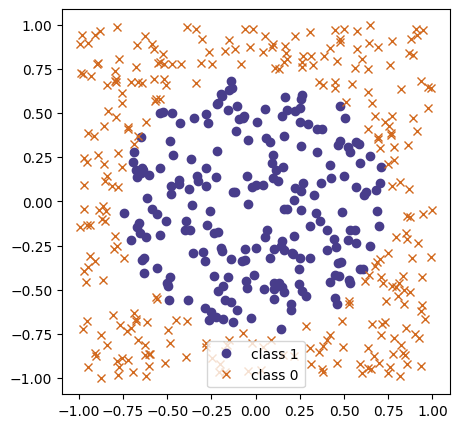

In [51]:
plot_back_propagation(x_mat_full, y_circle)

/tmp/ipykernel_5907/2451185109.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x[y == 1, 0], x[y == 1, 1], 'ro', label='class 1', color='darkslateblue')
/tmp/ipykernel_5907/2451185109.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x[y == 0, 0], x[y == 0, 1], 'bx', label='class 0', color='chocolate')


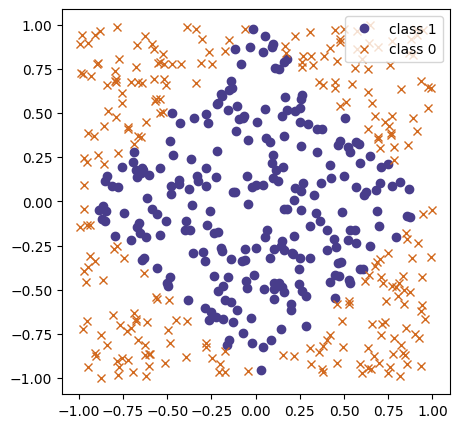

In [52]:
plot_back_propagation(x_mat_full, y_diamond)

/tmp/ipykernel_5907/2451185109.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x[y == 1, 0], x[y == 1, 1], 'ro', label='class 1', color='darkslateblue')
/tmp/ipykernel_5907/2451185109.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x[y == 0, 0], x[y == 0, 1], 'bx', label='class 0', color='chocolate')


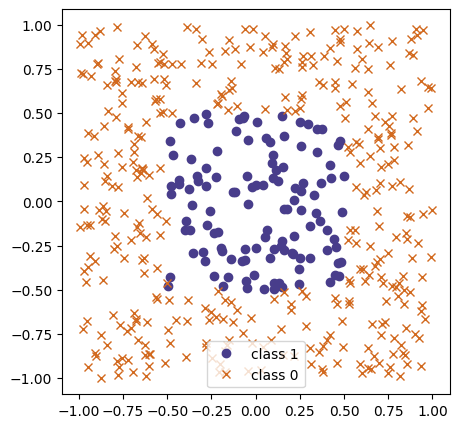

In [53]:
plot_back_propagation(x_mat_full, y_centered_square)

/tmp/ipykernel_5907/2451185109.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x[y == 1, 0], x[y == 1, 1], 'ro', label='class 1', color='darkslateblue')
/tmp/ipykernel_5907/2451185109.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x[y == 0, 0], x[y == 0, 1], 'bx', label='class 0', color='chocolate')


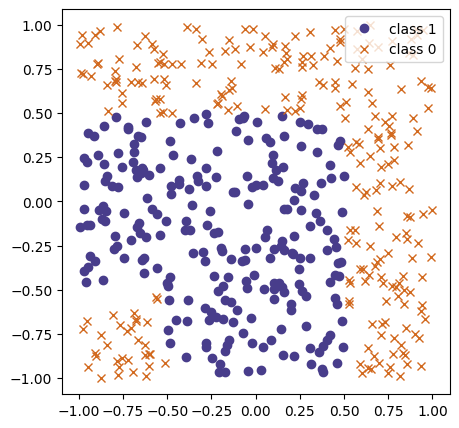

In [54]:
plot_back_propagation(x_mat_full, y_thick_ra)

/tmp/ipykernel_5907/2451185109.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x[y == 1, 0], x[y == 1, 1], 'ro', label='class 1', color='darkslateblue')
/tmp/ipykernel_5907/2451185109.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x[y == 0, 0], x[y == 0, 1], 'bx', label='class 0', color='chocolate')


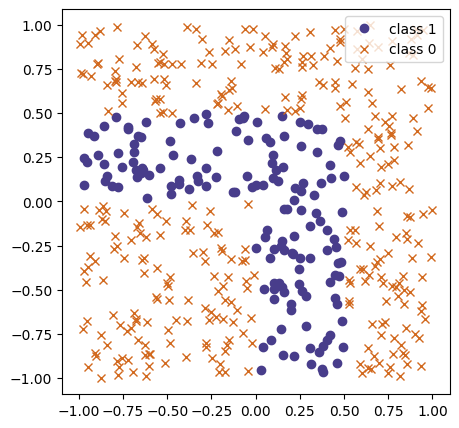

In [55]:
plot_back_propagation(x_mat_full, y_thin_ra)

Here are some helper functions


In [97]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    y_pred = np.maximum(y_pred, eps)
    y_pred = np.minimum(y_pred, (1 - eps))
    loss = -(np.sum(y_true * np.log(y_pred)) + np.sum((1 - y_true) * np.log(1 - y_pred))) / len(y_true)
    return loss


def forward_pass(x_mat, y, w1, w2):
    z_2 = np.dot(x_mat, w1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, w2)
    y_pred = sigmoid(z_3).reshape(len((x_mat), ))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2) * (1 - sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1, 1), w2.reshape(-1, 1).T) * a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy')


def plot_pred_and_true(x, y_true, y_pred):
    pred1 = (y_pred >= .5)
    pred0 = (y_pred < .5)

    fig, ax = plt.subplots(figsize=(8, 8))
    # true predictions
    ax.plot(x_mat[pred1 & (y_true == 1), 0], x[pred1 & (y_true == 1), 1], 'ro', label='true positives')
    ax.plot(x_mat[pred0 & (y_true == 0), 0], x[pred0 & (y_true == 0), 1], 'bx', label='true negatives')
    # false predictions
    ax.plot(x_mat[pred1 & (y_true == 0), 0], x[pred1 & (y_true == 0), 1], 'yx', label='false positives', markersize=15)
    ax.plot(x_mat[pred0 & (y_true == 1), 0], x[pred0 & (y_true == 1), 1], 'yo', label='false negatives', markersize=15, alpha=.6)
    ax.set(title='Truth vs Prediction')
    ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large')


def train_and_plot_loss(x, y, w1, w2, num_iter, learning_rate):
    loss_vals, accuracies = [], []

    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(x, y, w1, w2)
        
        ## Update the weight matrices
        w1 = w1 - learning_rate * J_W_1_grad 
        w2 = w2 - learning_rate * J_W_2_grad
        
        ### Compute the loss and accuracy
        curr_loss = loss_fn(y, y_pred)
        loss_vals.append(curr_loss)
        acc = np.sum((y_pred >= .5) == y) / num_obs
        accuracies.append(acc)

        ## Print the loss and accuracy for every 200th iteration
        if((i%200) == 0):
            print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
                i, curr_loss, acc
            ))
    plot_loss_accuracy(loss_vals, accuracies)
    plot_pred_and_true(x, y, y_pred)

In [98]:
np.random.seed(1241)
W1 = np.random.uniform(-1, 1, size=(3, 4))
W2 = np.random.uniform(-1, 1, size=(4))
num_iter = 5000
learning_rate = 0.001
x_mat = x_mat_full.copy()

iteration 0, log loss is 0.5518, accuracy is 0.762
iteration 200, log loss is 0.5462, accuracy is 0.762
iteration 400, log loss is 0.5409, accuracy is 0.762
iteration 600, log loss is 0.5235, accuracy is 0.762
iteration 800, log loss is 0.4780, accuracy is 0.762
iteration 1000, log loss is 0.4245, accuracy is 0.762
iteration 1200, log loss is 0.3942, accuracy is 0.792
iteration 1400, log loss is 0.3743, accuracy is 0.802
iteration 1600, log loss is 0.3401, accuracy is 0.846
iteration 1800, log loss is 0.2836, accuracy is 0.896
iteration 2000, log loss is 0.2342, accuracy is 0.93
iteration 2200, log loss is 0.2036, accuracy is 0.938
iteration 2400, log loss is 0.1851, accuracy is 0.934
iteration 2600, log loss is 0.1731, accuracy is 0.934
iteration 2800, log loss is 0.1649, accuracy is 0.936
iteration 3000, log loss is 0.1588, accuracy is 0.936
iteration 3200, log loss is 0.1542, accuracy is 0.938
iteration 3400, log loss is 0.1505, accuracy is 0.938
iteration 3600, log loss is 0.1474, 

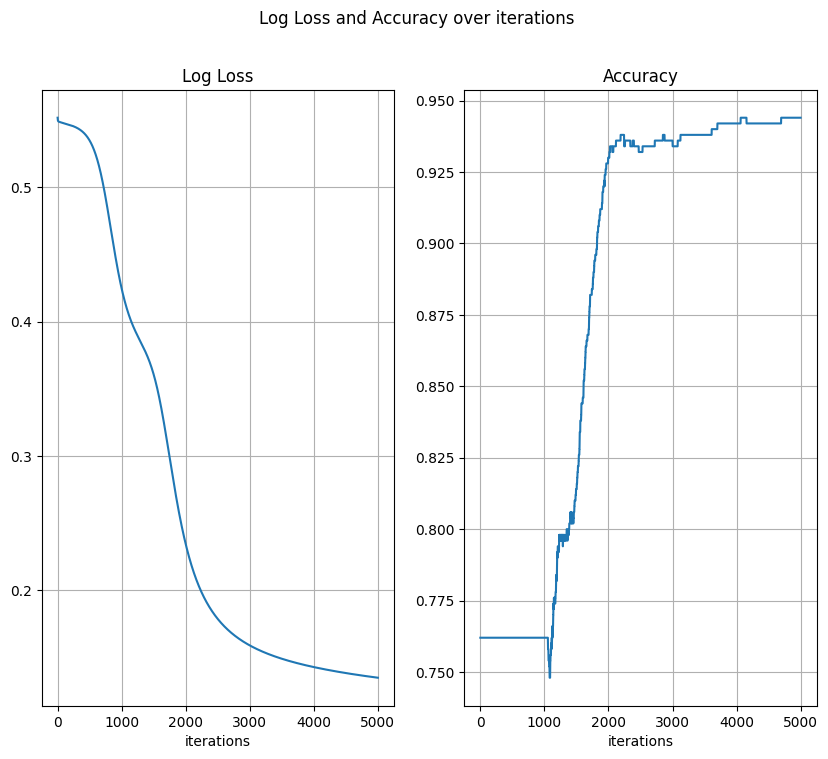

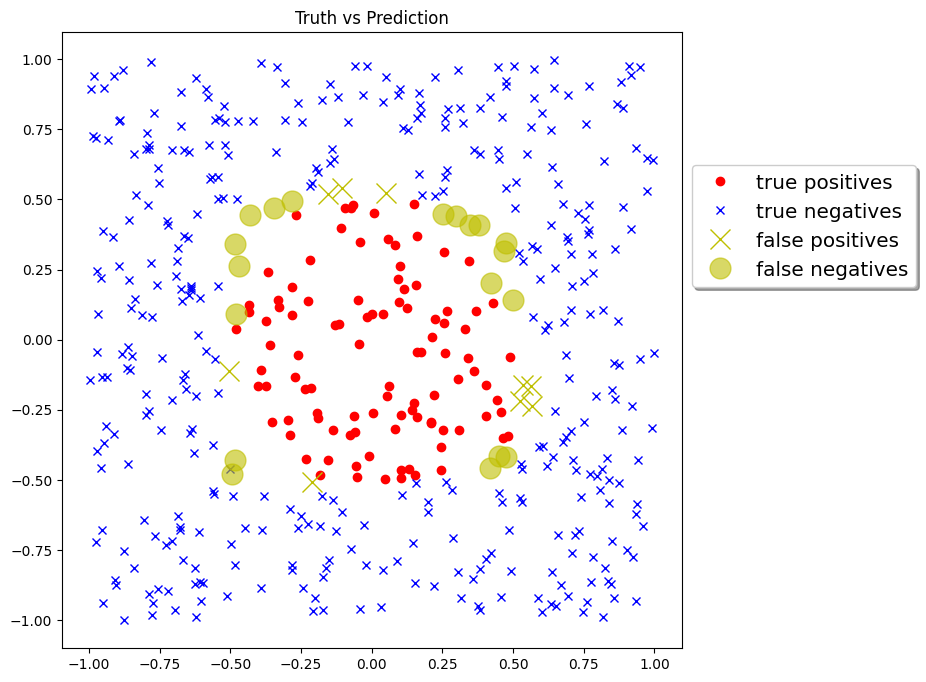

In [99]:
train_and_plot_loss(x_mat, y_centered_square, W1, W2, num_iter, learning_rate)

iteration 0, log loss is 0.7347, accuracy is 0.576
iteration 200, log loss is 0.6751, accuracy is 0.576
iteration 400, log loss is 0.6612, accuracy is 0.526
iteration 600, log loss is 0.6138, accuracy is 0.642
iteration 800, log loss is 0.5438, accuracy is 0.736
iteration 1000, log loss is 0.5017, accuracy is 0.756
iteration 1200, log loss is 0.4305, accuracy is 0.832
iteration 1400, log loss is 0.3221, accuracy is 0.92
iteration 1600, log loss is 0.2676, accuracy is 0.938
iteration 1800, log loss is 0.2403, accuracy is 0.94
iteration 2000, log loss is 0.2232, accuracy is 0.932
iteration 2200, log loss is 0.2112, accuracy is 0.938
iteration 2400, log loss is 0.2021, accuracy is 0.938
iteration 2600, log loss is 0.1947, accuracy is 0.938
iteration 2800, log loss is 0.1883, accuracy is 0.944
iteration 3000, log loss is 0.1828, accuracy is 0.946
iteration 3200, log loss is 0.1779, accuracy is 0.946
iteration 3400, log loss is 0.1735, accuracy is 0.946
iteration 3600, log loss is 0.1694, a

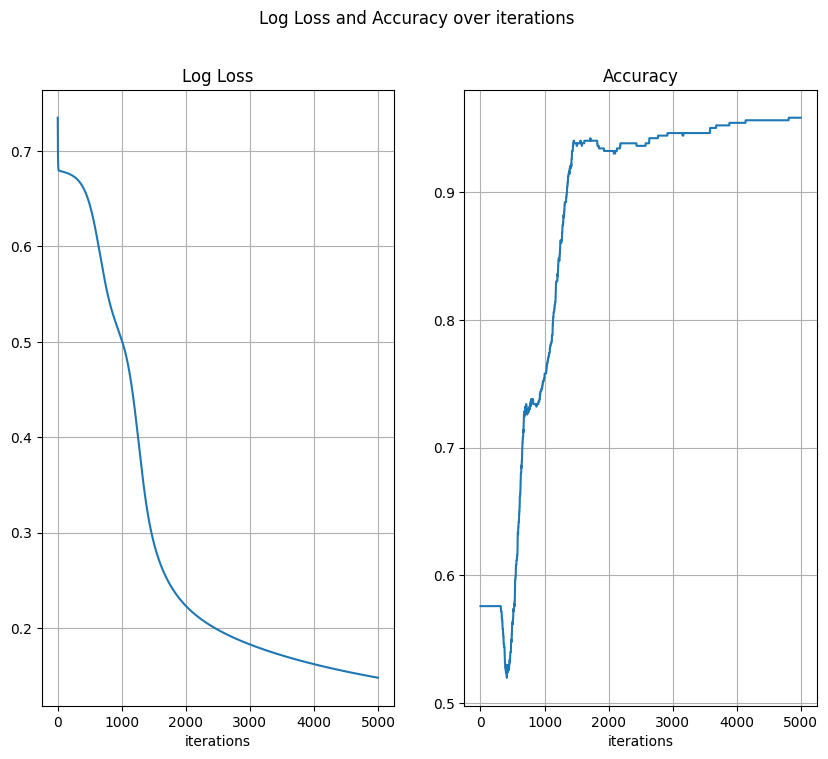

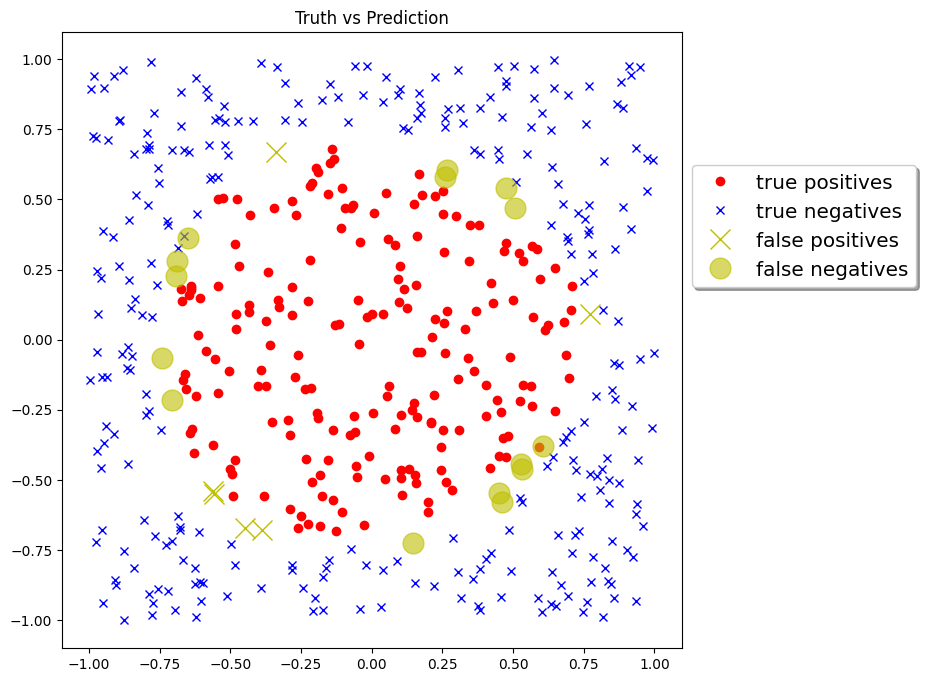

In [100]:
train_and_plot_loss(x_mat, y_circle, W1, W2, num_iter, learning_rate)

iteration 0, log loss is 0.7735, accuracy is 0.518
iteration 200, log loss is 0.5382, accuracy is 0.738
iteration 400, log loss is 0.5115, accuracy is 0.752
iteration 600, log loss is 0.4701, accuracy is 0.816
iteration 800, log loss is 0.4165, accuracy is 0.874
iteration 1000, log loss is 0.3646, accuracy is 0.888
iteration 1200, log loss is 0.3106, accuracy is 0.902
iteration 1400, log loss is 0.2578, accuracy is 0.894
iteration 1600, log loss is 0.2189, accuracy is 0.914
iteration 1800, log loss is 0.1868, accuracy is 0.944
iteration 2000, log loss is 0.1618, accuracy is 0.96
iteration 2200, log loss is 0.1438, accuracy is 0.968
iteration 2400, log loss is 0.1310, accuracy is 0.97
iteration 2600, log loss is 0.1214, accuracy is 0.98
iteration 2800, log loss is 0.1141, accuracy is 0.982
iteration 3000, log loss is 0.1082, accuracy is 0.982
iteration 3200, log loss is 0.1033, accuracy is 0.988
iteration 3400, log loss is 0.0993, accuracy is 0.988
iteration 3600, log loss is 0.0959, ac

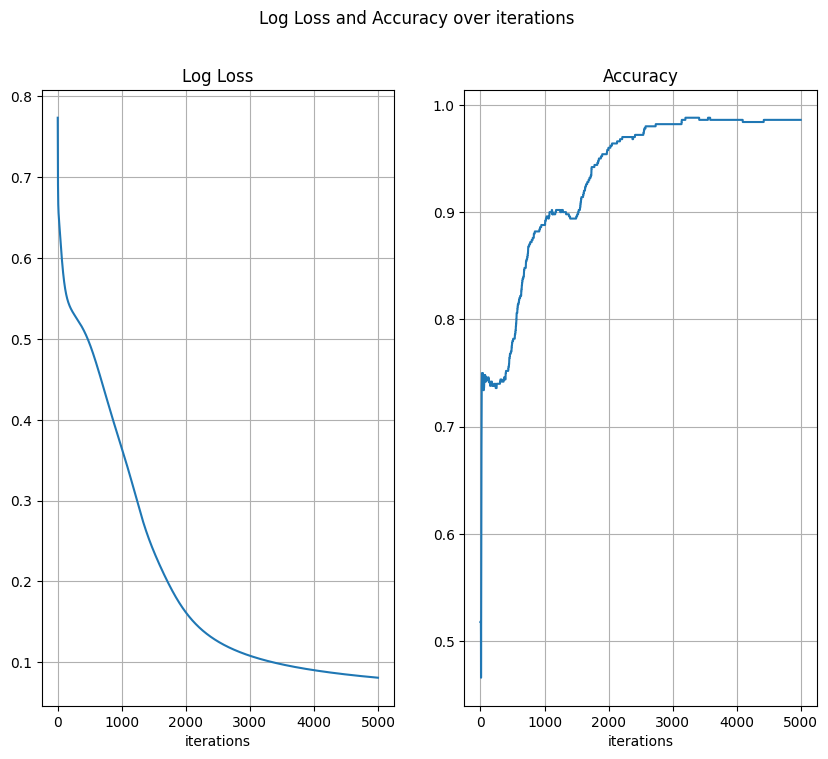

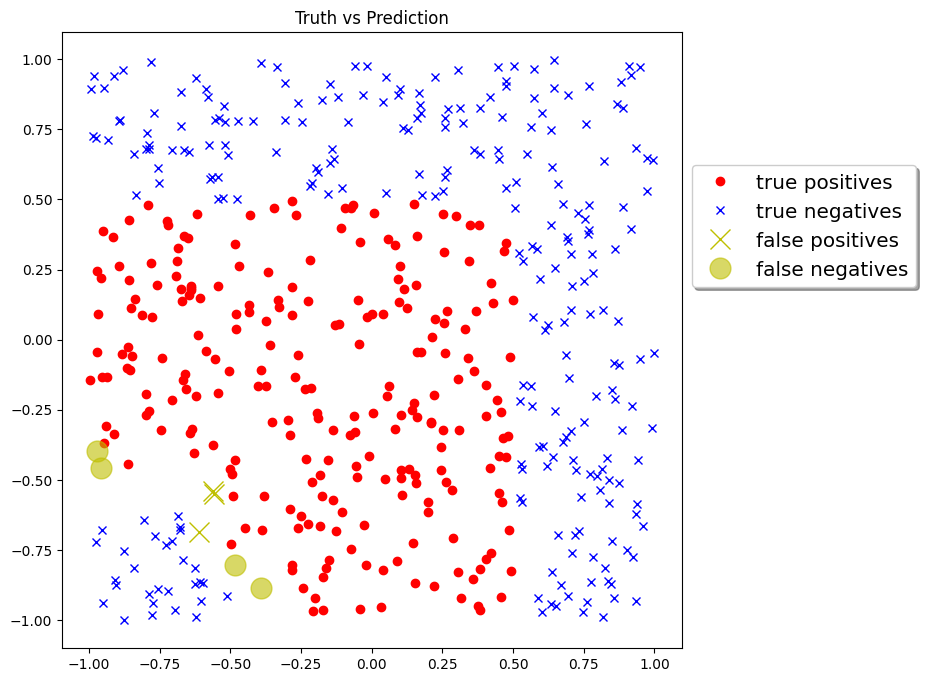

In [101]:
train_and_plot_loss(x_mat, y_thick_ra, W1, W2, num_iter, learning_rate)